In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,Dropout,Activation,MaxPooling2D
import random
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
mnist=tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
input_shape=(28,28,1)
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)




In [ ]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain/=255
xtest/=255

In [ ]:
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               946600    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                      

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2051 - accuracy: 0.9387
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0849 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0578 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0461 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0366 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0294 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0275 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0244 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0195 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
test_loss,test_accuracy=model.evaluate(xtest,ytest)
print(test_loss,test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9850
0.058314744383096695 0.9850000143051147


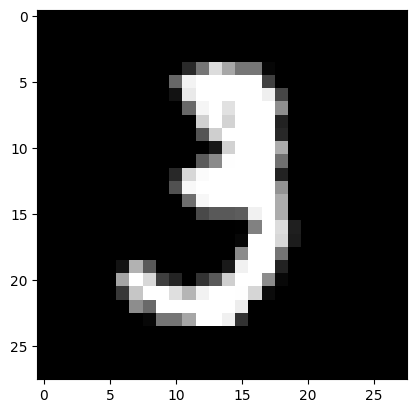

In [ ]:
img=xtrain[10]
plt.imshow(np.squeeze(img),cmap='gray')
plt.show()

In [ ]:
img=img.reshape(1,28,28,1)
predict_model=model.predict([img])
print(np.argmax(predict_model))

1/1 [==============================] - 0s 26ms/step
3


In [ ]:
`